#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Loading Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_data.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Text(0.5, 1.0, 'Correlation Heatmap')

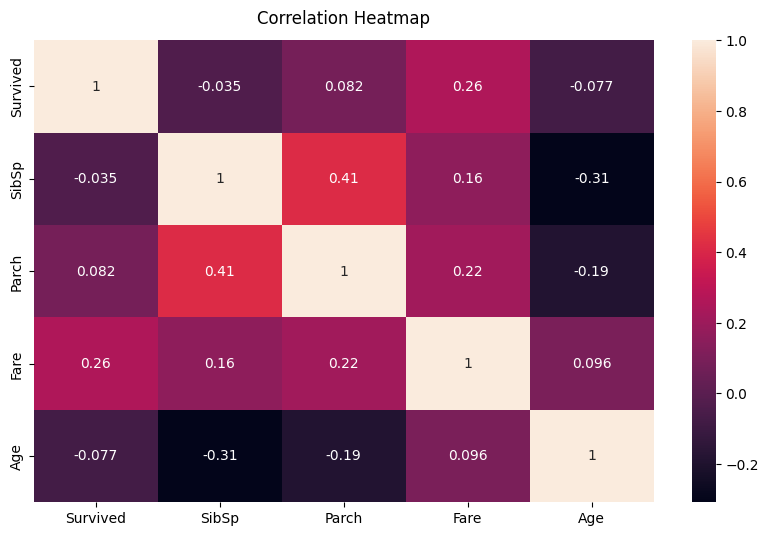

In [ ]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(data[['Survived','SibSp','Parch','Fare','Age']].corr(),annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
data['SibSp'].nunique()

7

In [ ]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

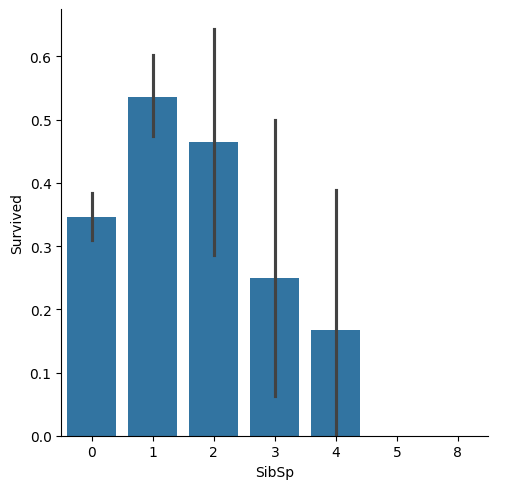

In [ ]:
sns.catplot(x='SibSp', y='Survived', data=data, kind='bar')

In [ ]:
mean = data['Age'].mean()
std = data['Age'].std()
is_null = data['Age'].isnull().sum()
print(mean, std, is_null)


29.69911764705882 14.526497332334042 177


In [ ]:
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
rand_age

array([24, 26, 20, 15, 28, 21, 42, 42, 33, 36, 26, 22, 23, 23, 19, 28, 28,
       29, 30, 36, 16, 30, 37, 41, 24, 36, 17, 16, 25, 30, 29, 29, 26, 31,
       19, 25, 34, 18, 43, 16, 15, 27, 21, 24, 37, 17, 28, 31, 21, 17, 17,
       35, 24, 23, 38, 21, 21, 29, 25, 38, 24, 39, 28, 41, 41, 29, 37, 16,
       43, 33, 22, 15, 18, 42, 30, 40, 30, 18, 29, 25, 41, 30, 15, 42, 22,
       16, 17, 23, 23, 28, 21, 35, 15, 18, 24, 15, 31, 37, 36, 22, 38, 28,
       41, 30, 36, 20, 30, 43, 17, 19, 28, 39, 15, 29, 34, 38, 38, 16, 21,
       31, 24, 37, 35, 15, 18, 23, 19, 40, 36, 19, 35, 41, 29, 21, 33, 16,
       32, 24, 27, 26, 26, 24, 36, 18, 19, 38, 26, 23, 31, 29, 27, 33, 16,
       30, 40, 15, 38, 15, 23, 33, 37, 33, 24, 25, 26, 18, 36, 38, 36, 29,
       37, 32, 36, 31, 37, 31, 38])

In [ ]:
a=data['Age'].copy()
a[np.isnan(a)]=rand_age
data['Age']=a


In [ ]:
data['Embarked']=data['Embarked'].fillna('S')


In [ ]:
col_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(col_to_drop, axis=1, inplace = True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
genders = {'male': 0, 'female': 1}
data['Sex'] = data['Sex'].map(genders)

ports = {'S': 0, 'C': 1, 'Q': 2}
data['Embarked'] = data['Embarked'].map(ports)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


#Splitting Up The Data

In [ ]:
x= data.drop(data.columns[[0]],axis=1)
y= data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

#Sclaing The Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

#Classification

In [ ]:
logreg = LogisticRegression()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_estimators=1000)
knn_classifier = KNeighborsClassifier(5)

In [ ]:
logreg.fit(x_train, y_train)
svm_classifier.fit(x_train, y_train)
dt_classifier.fit(x_train, y_train)
rf_classifier.fit(x_train, y_train)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
logreg_pred = logreg.predict(x_test)
svm_pred = svm_classifier.predict(x_test)
dt_pred = dt_classifier.predict(x_test)
rf_pred = rf_classifier.predict(x_test)
knn_pred = knn_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
logreg_acc = accuracy_score(y_test, logreg_pred)
svm_acc = accuracy_score(y_test, svm_pred)
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
knn_acc = accuracy_score(y_test, knn_pred)

print("Logistic Regression Accuracy:", round(logreg_acc*100, 2))
print("SVM Accuracy:", round(svm_acc*100, 2))
print("Decision Tree Accuracy:", round(dt_acc*100, 2))
print("Random Forest Accuracy:", round(rf_acc*100, 2))
print("KNN Accuracy:", round(knn_acc*100, 2))

Logistic Regression Accuracy: 80.6
SVM Accuracy: 81.72
Decision Tree Accuracy: 77.99
Random Forest Accuracy: 82.09
KNN Accuracy: 79.85


#Making Prediction Using The Models

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [ ]:
# Sample new data to predict
new_data = pd.DataFrame({
    'Pclass': [2],
    'Sex': [0],
    'Age': [60.0],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [53.100],
    'Embarked': [0]
})


new_data_scaled = sc_x.transform(new_data)


logreg_new_pred = logreg.predict(new_data_scaled)
svm_new_pred = svm_classifier.predict(new_data_scaled)
dt_new_pred = dt_classifier.predict(new_data_scaled)
rf_new_pred = rf_classifier.predict(new_data_scaled)
knn_new_pred = knn_classifier.predict(new_data_scaled)


print("Logistic Regression Prediction:", logreg_new_pred)
print("SVM Prediction:", svm_new_pred)
print("Decision Tree Prediction:", dt_new_pred)
print("Random Forest Prediction:", rf_new_pred)
print("KNN Prediction:", knn_new_pred)




Logistic Regression Prediction: [0]
SVM Prediction: [0]
Decision Tree Prediction: [0]
Random Forest Prediction: [0]
KNN Prediction: [0]
